In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

## Loading Test Data

In [2]:
direct = os.getcwd()
imu_data = pd.read_csv(direct + '/ABNORMAL/File5/imu_data.csv')
mag_data = pd.read_csv(direct + '/ABNORMAL/File5/mag_data.csv')
staticp_data = pd.read_csv(direct+ '/ABNORMAL/File5/staticp_data.csv')
temp_data = pd.read_csv(direct + '/ABNORMAL/File5/temp_data.csv')
camera_data = pd.read_csv(direct + '/ABNORMAL/File5/camera_data.csv')

In [3]:
imu_data = imu_data.loc[:, ~imu_data.columns.str.contains('^Unnamed')]
mag_data = mag_data.loc[:, ~mag_data.columns.str.contains('^Unnamed')]
staticp_data = staticp_data.loc[:, ~staticp_data.columns.str.contains('^Unnamed')]
temp_data = temp_data.loc[:, ~temp_data.columns.str.contains('^Unnamed')]
camera_data = camera_data.loc[:, ~camera_data.columns.str.contains('^Unnamed')]

In [4]:
imu_data.set_index('timestampimu')
mag_data.set_index('timestampmag')
staticp_data.set_index('timestamp_staticp')
temp_data.set_index('timestamp_temp')
camera_data.set_index('timestamp_image')

,frame_similarity
timestamp_image,
1.579257e+09,59.400000
1.579257e+09,20.600000
1.579257e+09,22.000000
1.579257e+09,11.000000
1.579257e+09,0.404040
1.579257e+09,100.000000
1.579257e+09,0.202020
1.579257e+09,17.600000
1.579257e+09,0.800000


## Loading Reqd. Models

In [5]:
pca = pickle.load(open('pca_transform.sav', 'rb'))

In [6]:
clf = pickle.load(open('iforest_classifier.sav', 'rb'))

## Reading Data Time Wise & Evaluating Score

In [7]:
imu_index,mag_index,staticp_index ,temp_index ,camera_index = 0,0,0,0,0
while staticp_index < np.shape(staticp_data)[0]:
    if(imu_data['timestampimu'][imu_index] <= temp_data['timestamp_temp'][temp_index]) and temp_index!= np.shape(temp_data)[0]-1:
        imu_index+=1
    if(camera_data['timestamp_image'][camera_index] <= temp_data['timestamp_temp'][temp_index]) and camera_index!=np.shape(camera_data)[0]-1:
        camera_index+=1
    if(mag_data['timestampmag'][mag_index] <= temp_data['timestamp_temp'][temp_index]) and mag_index!= np.shape(mag_data)[0]-1:
        mag_index+=1
    data_point = np.hstack((imu_data['or_x'][imu_index], imu_data['or_y'][imu_index], imu_data['or_z'][imu_index], imu_data['or_w'][imu_index], imu_data['av_x'][imu_index], imu_data['av_y'][imu_index], imu_data['av_z'][imu_index], imu_data['la_x'][imu_index], imu_data['la_y'][imu_index], imu_data['la_z'][imu_index], mag_data['mf_x'][mag_index], mag_data['mf_y'][mag_index], mag_data['mf_z'][mag_index], temp_data['temp'][temp_index], staticp_data['staticp'][staticp_index], camera_data['frame_similarity'][camera_index]))
    data_point = np.reshape(data_point, (1,16))
    data_point = pca.transform(data_point)
    print(clf.decision_function(data_point), '@', staticp_data['timestamp_staticp'][staticp_index], 's')
    staticp_index+=1
    temp_index+=1

[0.08484951] @ 1579257487.6171262 s
[0.09267659] @ 1579257487.8604307 s
[0.08872711] @ 1579257488.099968 s
[0.09256498] @ 1579257488.3512425 s
[0.08557541] @ 1579257488.5822408 s
[0.03449865] @ 1579257488.820868 s
[0.06169324] @ 1579257489.063947 s
[0.03357845] @ 1579257489.3013027 s
[0.00865554] @ 1579257489.5405395 s
[0.02461806] @ 1579257489.791283 s
[0.03990214] @ 1579257490.0296664 s
[0.02799835] @ 1579257490.2677188 s
[-0.00464389] @ 1579257490.511317 s
[-0.04670448] @ 1579257490.7450411 s
[-0.09139091] @ 1579257490.9952438 s
[-0.10146726] @ 1579257491.2336106 s
[-0.09727889] @ 1579257491.4716609 s
[-0.11774943] @ 1579257491.7247472 s
[-0.12256091] @ 1579257491.9523206 s
[-0.11749434] @ 1579257492.1936655 s
[-0.12217293] @ 1579257492.4382553 s
[-0.12501341] @ 1579257492.675774 s
[-0.14811349] @ 1579257492.9143975 s
[-0.1358573] @ 1579257493.1540911 s
[-0.11895057] @ 1579257493.3950925 s
[-0.11782621] @ 1579257493.6372626 s
[-0.02611181] @ 1579257493.8805585 s
[0.01932304] @ 15792

## Evaluation Using Excess Mass Curve

In [8]:
alpha_min = 0.001
alpha_max = 0.999
t_max = 0.9
from sklearn.metrics import auc
def em(t, t_max, volume_support, s_unif, s_X, n_generated):
    EM_t = np.zeros(t.shape[0])
    n_samples = s_X.shape[0]
    s_X_unique = np.unique(s_X)
    EM_t[0] = 1.
    for u in s_X_unique:
        # if (s_unif >= u).sum() > n_generated / 1000:
        EM_t = np.maximum(EM_t, 1. / n_samples * (s_X > u).sum() -
                          t * (s_unif > u).sum() / n_generated
                          * volume_support)
    amax = np.argmax(EM_t <= t_max) + 1
    if amax == 1:
        amax = -1
    AUC = auc(t[:amax], EM_t[:amax])
    return AUC, EM_t, amax




In [9]:

n_features = 8
n_samples = 1773
n_generated = 100000
n_samples_train = 1476
n_samples_test = n_samples - n_samples_train
lim_inf = np.array([-4.50841779e+05, -1.07776506e+06, -1.68198712e+05, -7.58950810e+02, -8.11557731e+01, -8.57828810e+00, -1.24358562e+01 ,-6.64792465e-01])
lim_sup = np.array([4.12860153e+05, 3.88548183e+05, 1.33283202e+06, 2.64842783e+03,7.32941231e+01 ,1.20470530e+01 ,7.14800514e+00, 2.72558977e+00])
volume_support = (lim_sup - lim_inf).prod()
t = np.arange(0, 100 / volume_support, 0.01 / volume_support)
axis_alpha = np.arange(alpha_min, alpha_max, 0.0001)
unif = np.random.uniform(lim_inf, lim_sup, size=(n_generated, n_features))
main_test = np.array([])

In [10]:
imu_index,mag_index,staticp_index ,temp_index ,camera_index = 0,0,0,0,0
while staticp_index < np.shape(staticp_data)[0]:
    if(imu_data['timestampimu'][imu_index] <= temp_data['timestamp_temp'][temp_index]) and temp_index!= np.shape(temp_data)[0]-1:
        imu_index+=1
    if(camera_data['timestamp_image'][camera_index] <= temp_data['timestamp_temp'][temp_index]) and camera_index!=np.shape(camera_data)[0]-1:
        camera_index+=1
    if(mag_data['timestampmag'][mag_index] <= temp_data['timestamp_temp'][temp_index]) and mag_index!= np.shape(mag_data)[0]-1:
        mag_index+=1
    data_point = np.hstack((imu_data['or_x'][imu_index], imu_data['or_y'][imu_index], imu_data['or_z'][imu_index], imu_data['or_w'][imu_index], imu_data['av_x'][imu_index], imu_data['av_y'][imu_index], imu_data['av_z'][imu_index], imu_data['la_x'][imu_index], imu_data['la_y'][imu_index], imu_data['la_z'][imu_index], mag_data['mf_x'][mag_index], mag_data['mf_y'][mag_index], mag_data['mf_z'][mag_index], temp_data['temp'][temp_index], staticp_data['staticp'][staticp_index], camera_data['frame_similarity'][camera_index]))
    data_point = np.reshape(data_point, (1,16))
    data_point = pca.transform(data_point)
    main_test = np.append(main_test, data_point)
    staticp_index+=1
    temp_index+=1
main_test = np.reshape(main_test, (-1, 8))

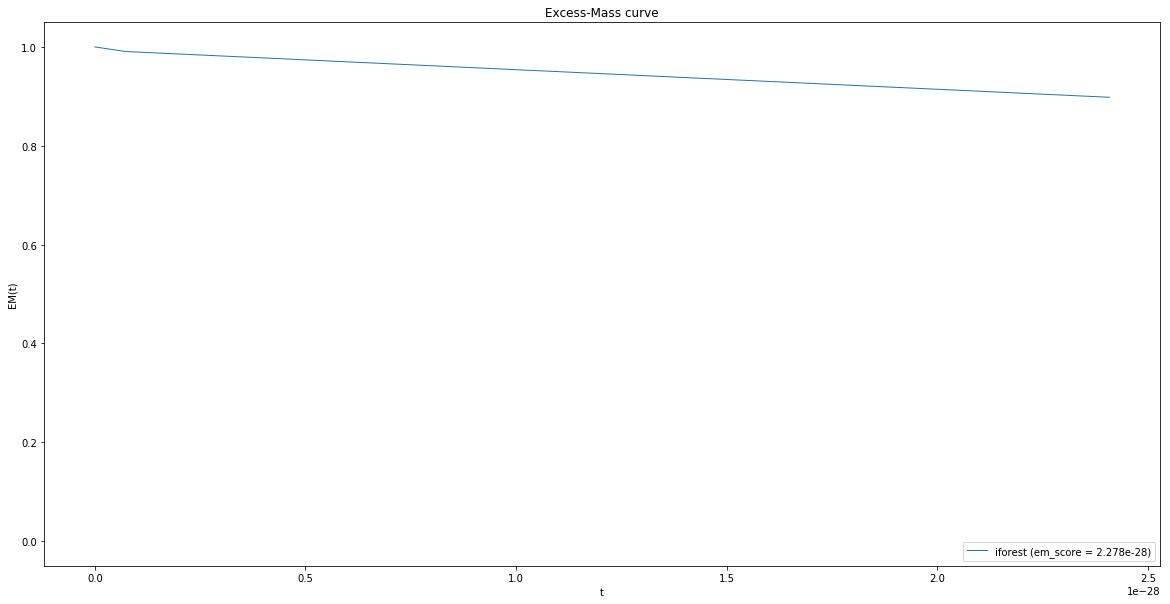

In [17]:
s_X_iforest = clf.decision_function(main_test)
s_unif_iforest = clf.decision_function(unif)
auc_iforest, em_iforest, amax_iforest = em(t, t_max, volume_support, s_unif_iforest, s_X_iforest, n_generated)
if amax_iforest == -1:
     amax = -1
else:
    amax = amax_iforest
plt.figure(figsize=(20, 10))
plt.plot(t[:amax], em_iforest[:amax], lw=1,label='%s (em_score = %0.3e)'% ('iforest', auc_iforest))
plt.ylim([-0.05, 1.05])
plt.xlabel('t')
plt.ylabel('EM(t)')
plt.title('Excess-Mass curve')
plt.legend(loc="lower right")
plt.show()